In [1]:
library(Seurat)
library(ggplot2)
library(pipeR)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
data1 <- readRDS('1_intact/1_intact.rds')
data1@meta.data$sample <- '1_intact'
data2 <- readRDS('2_intact/2_intact.rds')
data2@meta.data$sample <- '2_intact'
integ_12 <- list(data1, data2)
drop(data1)
drop(data2)
anchors12 <- FindIntegrationAnchors(object.list = integ_12, dims = 1:30, reduction = "cca")
integ_data12 <- IntegrateData(anchorset = anchors12, dims = 1:30)

An object of class Seurat 
21654 features across 12136 samples within 1 assay 
Active assay: RNA (21654 features)
 2 dimensional reductions calculated: pca, umap

An object of class Seurat 
20721 features across 6523 samples within 1 assay 
Active assay: RNA (20721 features)
 2 dimensional reductions calculated: pca, umap

Warning message in CheckDuplicateCellNames(object.list = object.list):
“Some cell names are duplicated across objects provided. Renaming to enforce unique cell names.”
Computing 2000 integration features

Scaling features for provided objects

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 14991 anchors

Filtering anchors

	Retained 9312 anchors

Extracting within-dataset neighbors

Merging dataset 2 into 1

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Warning message:
“Adding a command log without an assay associated with it”


In [4]:
data3 <- readRDS('3_injury/3_injury.rds')
data3@meta.data$sample <- '3_injury'
data4 <- readRDS('4_injury/4_injury.rds')
data4@meta.data$sample <- '4_injury'
integ_34 <- list(data3, data4)
drop(data3)
drop(data4)
anchors34 <- FindIntegrationAnchors(object.list = integ_34, dims = 1:30, reduction = "cca")
integ_data34 <- IntegrateData(anchorset = anchors34, dims = 1:30)

An object of class Seurat 
21223 features across 8270 samples within 1 assay 
Active assay: RNA (21223 features)
 2 dimensional reductions calculated: pca, umap

An object of class Seurat 
21177 features across 9351 samples within 1 assay 
Active assay: RNA (21177 features)
 2 dimensional reductions calculated: pca, umap

Warning message in CheckDuplicateCellNames(object.list = object.list):
“Some cell names are duplicated across objects provided. Renaming to enforce unique cell names.”
Computing 2000 integration features

Scaling features for provided objects

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 18328 anchors

Filtering anchors

	Retained 11009 anchors

Extracting within-dataset neighbors

Merging dataset 1 into 2

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Warning message:
“Adding a command log without an assay associated with it”


In [5]:
drop(anchors12)
drop(anchors34)
integ_all <- list(integ_data12, integ_data34)
anchors <- FindIntegrationAnchors(object.list = integ_all, dims = 1:30, reduction = "cca")
integ_data <- IntegrateData(anchorset = anchors, dims = 1:30)
DefaultAssay(integ_data) <- "integrated"
saveRDS(integ_data, 'integrated_data.rds')

An AnchorSet object containing 18624 anchors between 2 Seurat objects 
 This can be used as input to IntegrateData or TransferData.

An AnchorSet object containing 22018 anchors between 2 Seurat objects 
 This can be used as input to IntegrateData or TransferData.

Warning message in CheckDuplicateCellNames(object.list = object.list):
“Some cell names are duplicated across objects provided. Renaming to enforce unique cell names.”
Computing 2000 integration features

Scaling features for provided objects

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 34988 anchors

Filtering anchors

	Retained 18906 anchors

Extracting within-dataset neighbors

Merging dataset 2 into 1

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Warning message:
“Adding a command log without an assay associated with it”


In [6]:
integ_data <- ScaleData(integ_data)
integ_data <- RunPCA(integ_data , npcs = 30)
integ_data <- RunUMAP(integ_data, reduction = "pca", dims = 1:5, umap.method='umap-learn', metric='correlation')
integ_data <- FindNeighbors(integ_data, reduction = "pca", dims = 1:5)
integ_data <- FindClusters(integ_data, resolution = 0.5)

Centering and scaling data matrix

PC_ 1 
Positive:  Basp1, Stmn3, Stmn2, Mllt11, Ttc9b, Rtn1, Celf4, Gng3, Mapt, Myt1l 
	   Aplp1, Rab3a, Bcl11b, Ywhag, Klc1, Kif5c, Olfm1, Rab6b, Adarb2, Tubb4a 
	   Gap43, Bex1, Snrpn, Nell2, Snap25, Camk2n2, Fyn, Chgb, Grin2b, Gabrb3 
Negative:  Rsph1, Ccdc153, Tm4sf1, 1700016K19Rik, 1700007K13Rik, Meig1, Ak7, Dnah12, Cfap54, 1110017D15Rik 
	   Dnah9, Dynlrb2, Efcab10, Dnah6, Foxj1, 1700012B09Rik, Cfap206, Fam183b, Dnali1, Cfap126 
	   Spef2, Pifo, Tmem212, Gm867, Lrrc23, Gm19935, Spag17, 1700001C02Rik, Ccdc113, Rsph4a 
PC_ 2 
Positive:  Eng, Foxq1, Flt1, Esam, Cldn5, Adgrf5, Cd93, Ctla2a, Cdh5, BC028528 
	   Vwa1, Adgrl4, Slc22a8, Ptprb, Slc40a1, Ecscr, Kdr, Foxf2, AU021092, Slc38a5 
	   Slc39a8, Igfbp7, Pecam1, Nid1, Fn1, Cd34, Grap, Vwf, Gimap6, Tmem204 
Negative:  Rtn1, Nnat, Arhgdig, Ly6h, Stmn3, Plppr4, Celf4, Basp1, Fam81a, Hsp90aa1 
	   Atp1b1, Mllt11, Elmod1, C1qtnf4, Sncb, Ndn, Caly, Diras2, Gap43, Cnih2 
	   Cxadr, Dnajc6, Snap25, Syt1, G

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 36280
Number of edges: 1059125

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9304
Number of communities: 18
Elapsed time: 55 seconds


In [7]:
saveRDS(integ_data, 'integrated_data.rds')

In [8]:
#integ_data <- readRDS('integrated_data.rds')

Warning message in gzfile(file, "rb"):
“ 圧縮されたファイル 'integrated_dara.rds' を開くことができません, 理由は 'そのようなファイルやディレクトリはありません' です ”


ERROR: Error in gzfile(file, "rb"):  コネクションを開くことができません 


Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”


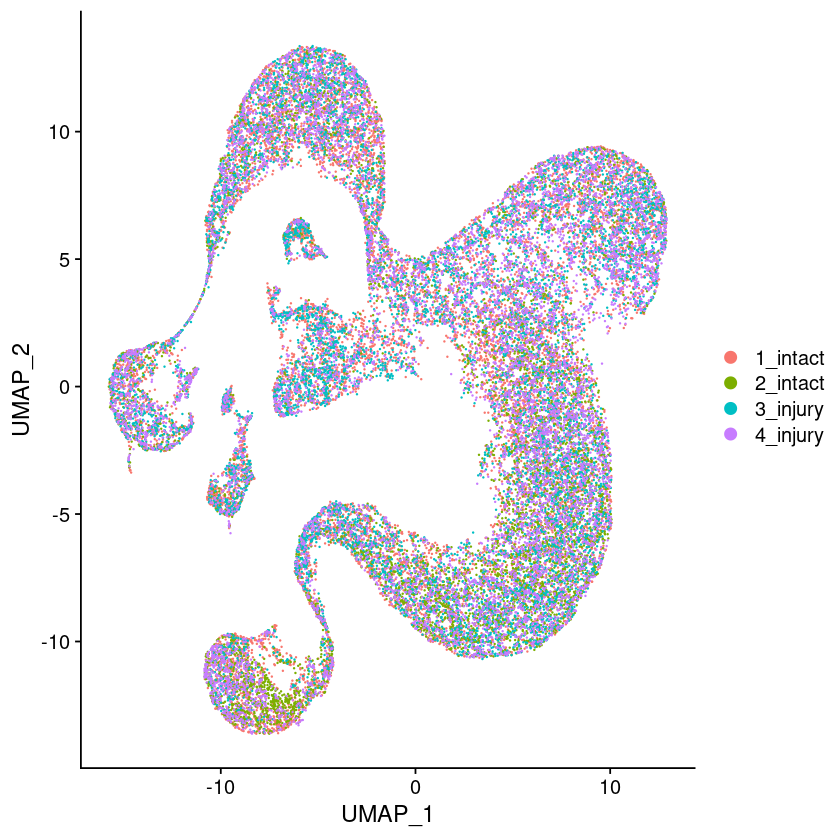

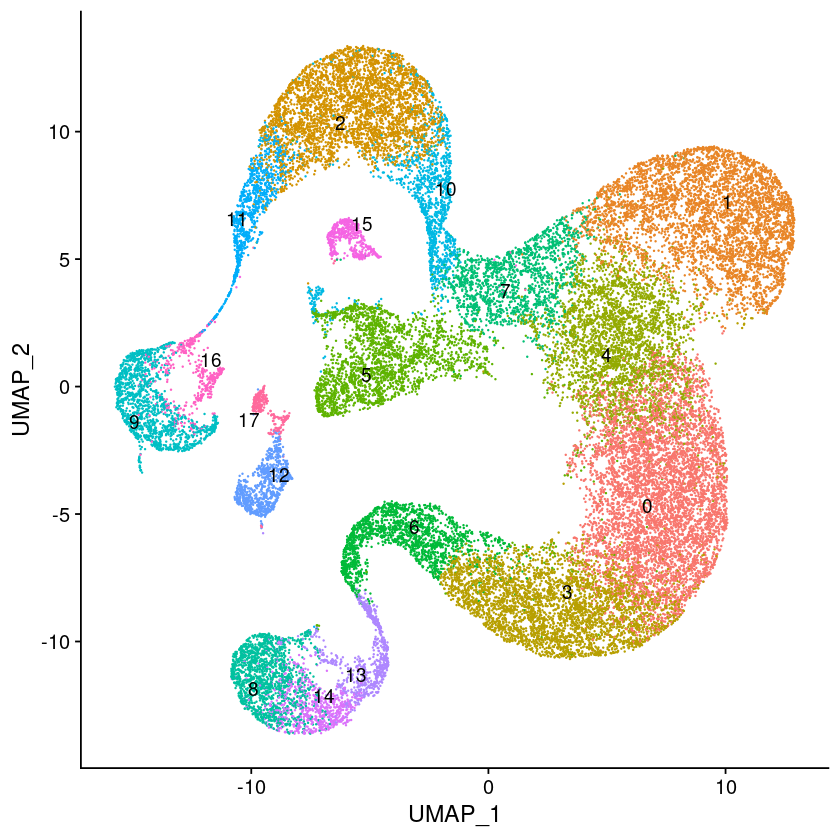

In [9]:
p1 <- DimPlot(integ_data, reduction = "umap", group.by = "sample")
plot(p1)
p2 <- DimPlot(
  integ_data,
  reduction = "umap",
  label = TRUE,
  repel = TRUE) + NoLegend()
plot(p2)